In [8]:

import os
import pickle
import pandas as pd
import sys
import sys
from memory_profiler import profile
import pandas as pd
import numpy as np
sys.path.append('/home/ak/Documents/Research/PaperCode/MultiKernelLearning')
sys.path.append('/home/ak/Documents/Research/PaperCode/singlekernelclf/')
import jsonpickle
from collections import defaultdict
from sklearn.svm import SVC
from collections import OrderedDict
import os
from sklearn.metrics import accuracy_score
import torch


from fileutils import new_feature_utils as nfu
from fileutils.new_feature_utils import CreateMarketFeatures
import multiprocessing
import mkl_data_processing as mkldp
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
styleFiles = os.listdir(mpl.get_configdir())
styleFileIdx = 0

plt.style.use(os.path.join(mpl.get_configdir(), styleFiles[styleFileIdx]))

In [9]:
from fileutils import DataLoader as DataLoader
from fileutils import paths
from fileutils import new_feature_utils as nfu
from fileutils.new_feature_utils import CreateMarketFeatures

In [10]:
def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file


def forward_Dates(list_of_keys, current_date):
    """
    return all the forward looking dates for each idxKey we use for training

    :param list_of_keys: dates i have model dates for out of sample
    :param current_date: current model date
    :return: forward dates for applying the fitted model
    """
    lookAheadKeys = sorted(i for i in list_of_keys if i > current_date)
    return lookAheadKeys


In [11]:
laptopDataFolder  = '/media/ak/LaCie'
DataOnlyFolder = '/media/ak/DataOnly'

figures_destination = '/home/ak/Documents/Research/Papers/figures/'

mainPath = DataOnlyFolder #<---choose

expLocsDirectories = os.path.join(mainPath, 'ExperimentCommonLocs')




In [12]:
os.listdir(expLocsDirectories)

['LabelsAlternateThree',
 'FittedModelsAprilModels2021',
 'LabelsAlternateFour',
 'FittedModels',
 'Labels_AlternateApril2021',
 'processedSingleKernelOOS',
 'LabelsAlternateOne',
 'LabelsAlternateSix',
 'CrossValidationResults',
 'OOSPredictions',
 'MKLOOSPredictionsApril2021',
 'LabelsAlternateTwo',
 'MKLFittedModels',
 'LabelAnalysisResults',
 'JointLocationsDicts',
 'LabelsAlternateFive',
 'MKLOOSPredictions']

In [13]:

alternate_labels_nos = {1:"LabelsAlternateOne", 2:"LabelsAlternateTwo", 3:"LabelsAlternateThree", 
                        4:"LabelsAlternateFour", 5:"LabelsAlternateFive", 6:"LabelsAlternateSix", 
                        7:"LabelsAlternateSeven"}  # we have 7 alternative data types

fittedModelsPath = os.path.join(mainPath, "ExperimentCommonLocs/FittedModels")
oosPredictionsPath = os.path.join(mainPath, "ExperimentCommonLocs/OOSPredictions")

In [14]:
nonzerodict = defaultdict(dict)
zerodict = defaultdict(dict)

In [62]:
label_idx = 1  # to be serialised


labelsLocation = os.path.join(expLocsDirectories, alternate_labels_nos[label_idx])

symbols = sorted(os.listdir(labelsLocation))
symbolIdx = 26
symbolLabelsFilesPath = os.path.join(labelsLocation, symbols[symbolIdx])

print(symbols[symbolIdx])

RR.L


In [63]:
dates =[f.split(".csv")[0] for f in os.listdir(symbolLabelsFilesPath)]
len(symbols)

40

In [94]:
nonzerodict =dict()
zerodict = dict()
dateIdx = 0
for dateIdx in range(0, len(dates)-1):
    dateFile = os.path.join(symbolLabelsFilesPath, str(dates[dateIdx])+'.csv')
    df = pd.read_csv(dateFile)
    zerodict[dates[dateIdx]] = df[df['ReturnTradedPrice']==0]['Duration'].dropna()
    nonzerodict[dates[dateIdx]] = df[df['ReturnTradedPrice']!=0]['Duration'].dropna()
    

In [108]:
nonzero_df =list()
for dateIdx in range(0, len(dates)-1):
    dateFile = os.path.join(symbolLabelsFilesPath, str(dates[dateIdx])+'.csv')
    df = pd.read_csv(dateFile)
    nonzero_df.append(df[df['ReturnTradedPrice']!=0][['Duration','ReturnTradedPrice']].dropna())
  

In [95]:
nz_across_time =pd.DataFrame.from_dict(nonzerodict).fillna(0.01).median(axis =0)
nz_across_point_in_time =pd.DataFrame.from_dict(nonzerodict).fillna(0.01).median(axis =1)



In [96]:
df.columns.values

array(['Unnamed: 0', 'TradedTime', 'TradedPrice', 'ReturnTradedPrice',
       'Volume', 'Duration',
       'label_PrMov__window_5__thres_arbitrary__0.1'], dtype=object)

In [97]:
z_across_time =pd.DataFrame.from_dict(zerodict).median(axis =0)
z_across_point_in_time =pd.DataFrame.from_dict(zerodict).median(axis =1)



In [98]:
z_across_time = pd.DataFrame.from_dict(zerodict).median(axis=0)
z_across_point_in_time = pd.DataFrame.from_dict(zerodict).median(axis=1)

In [74]:
z_across_point_in_time

0        0.000000
1        0.010288
2        0.009782
3        0.009902
4        0.010685
           ...   
10449    1.196010
10451    0.007943
10454    0.429626
10455    0.750113
10464    3.464956
Length: 7580, dtype: float64

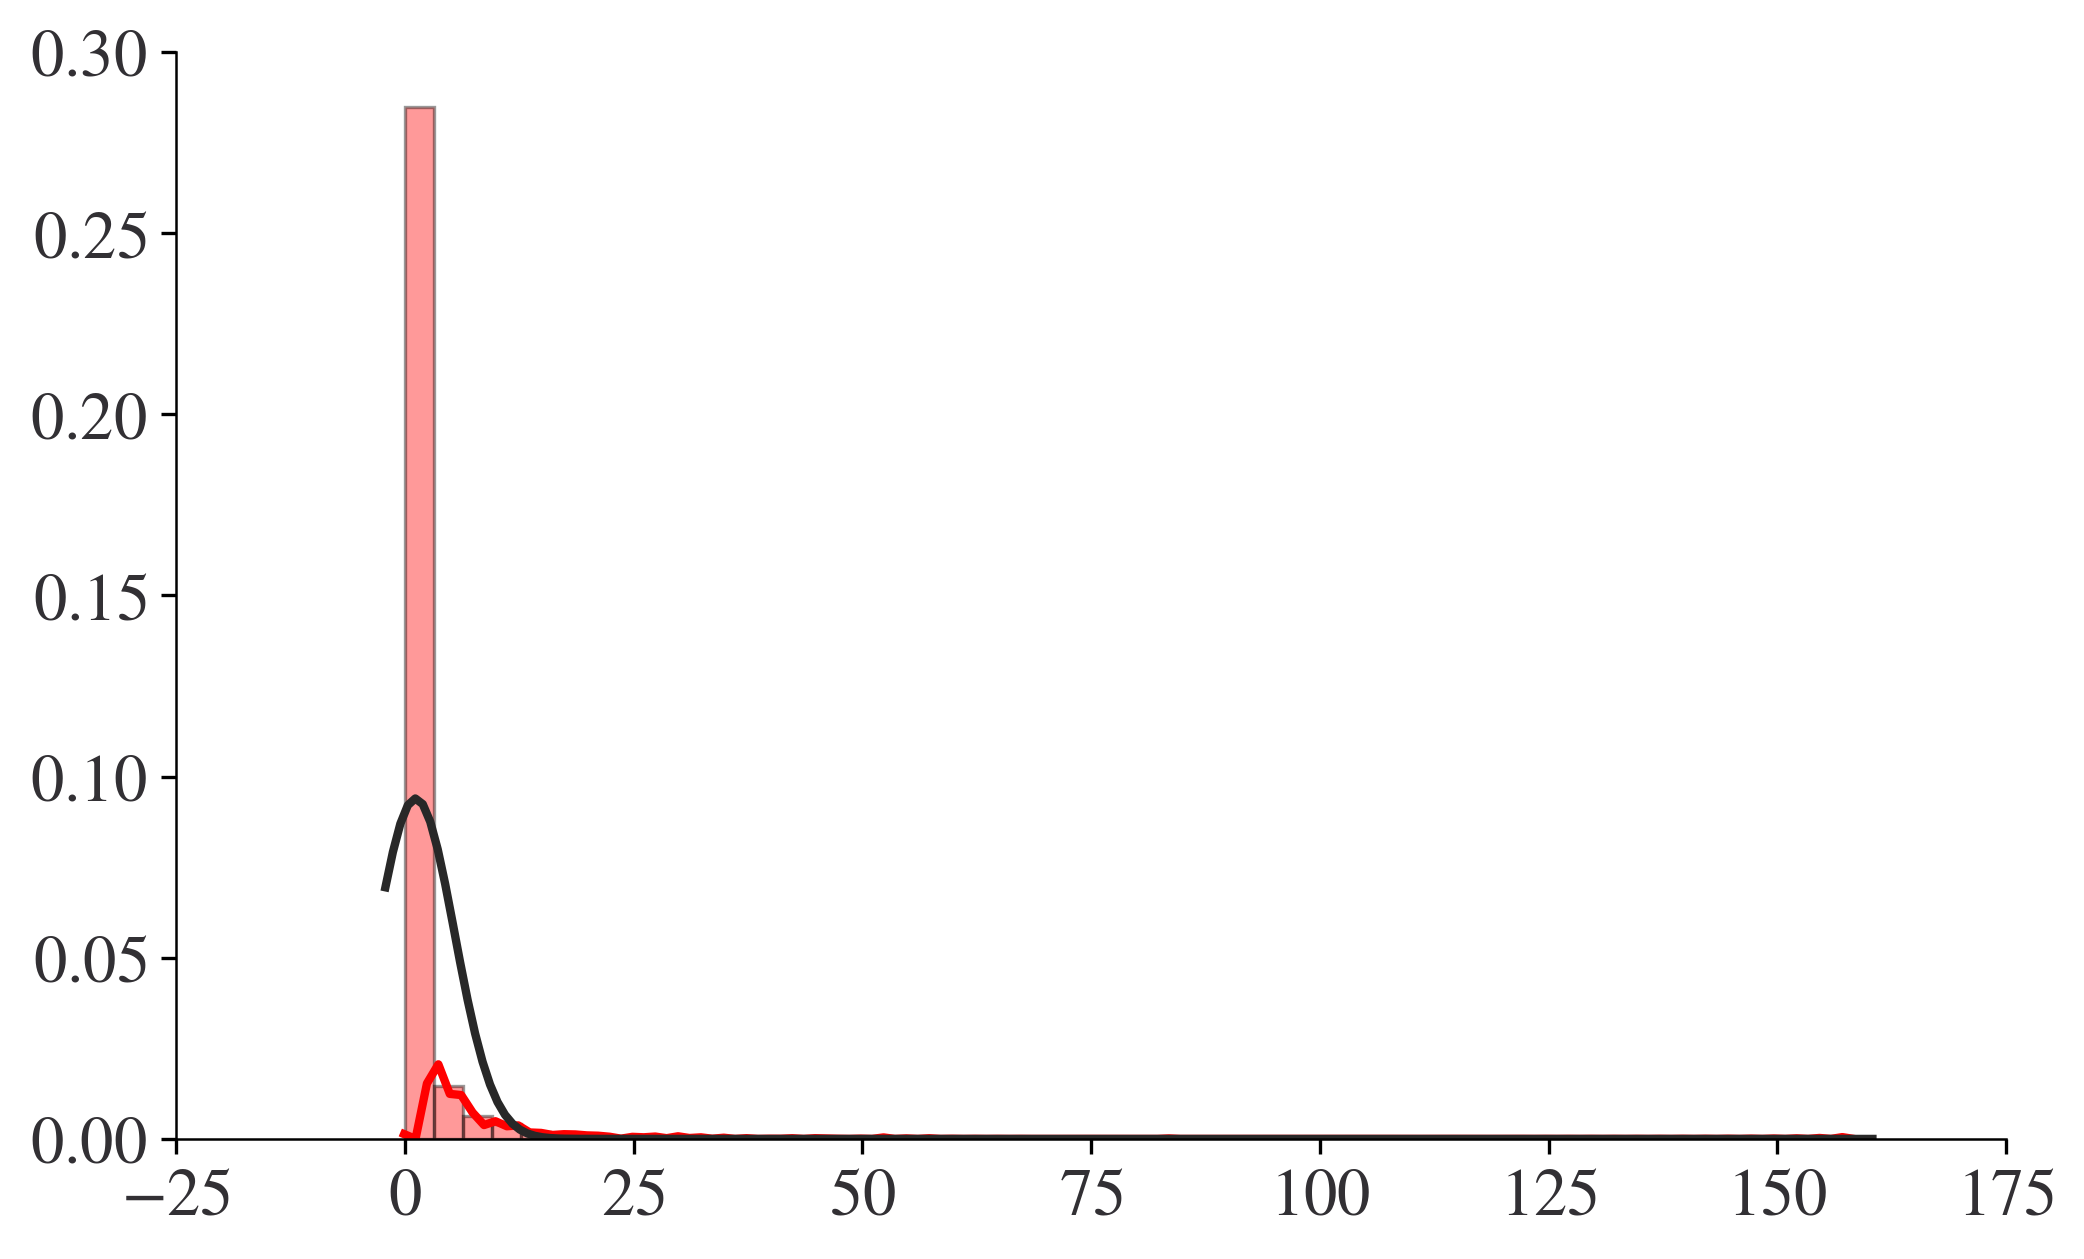

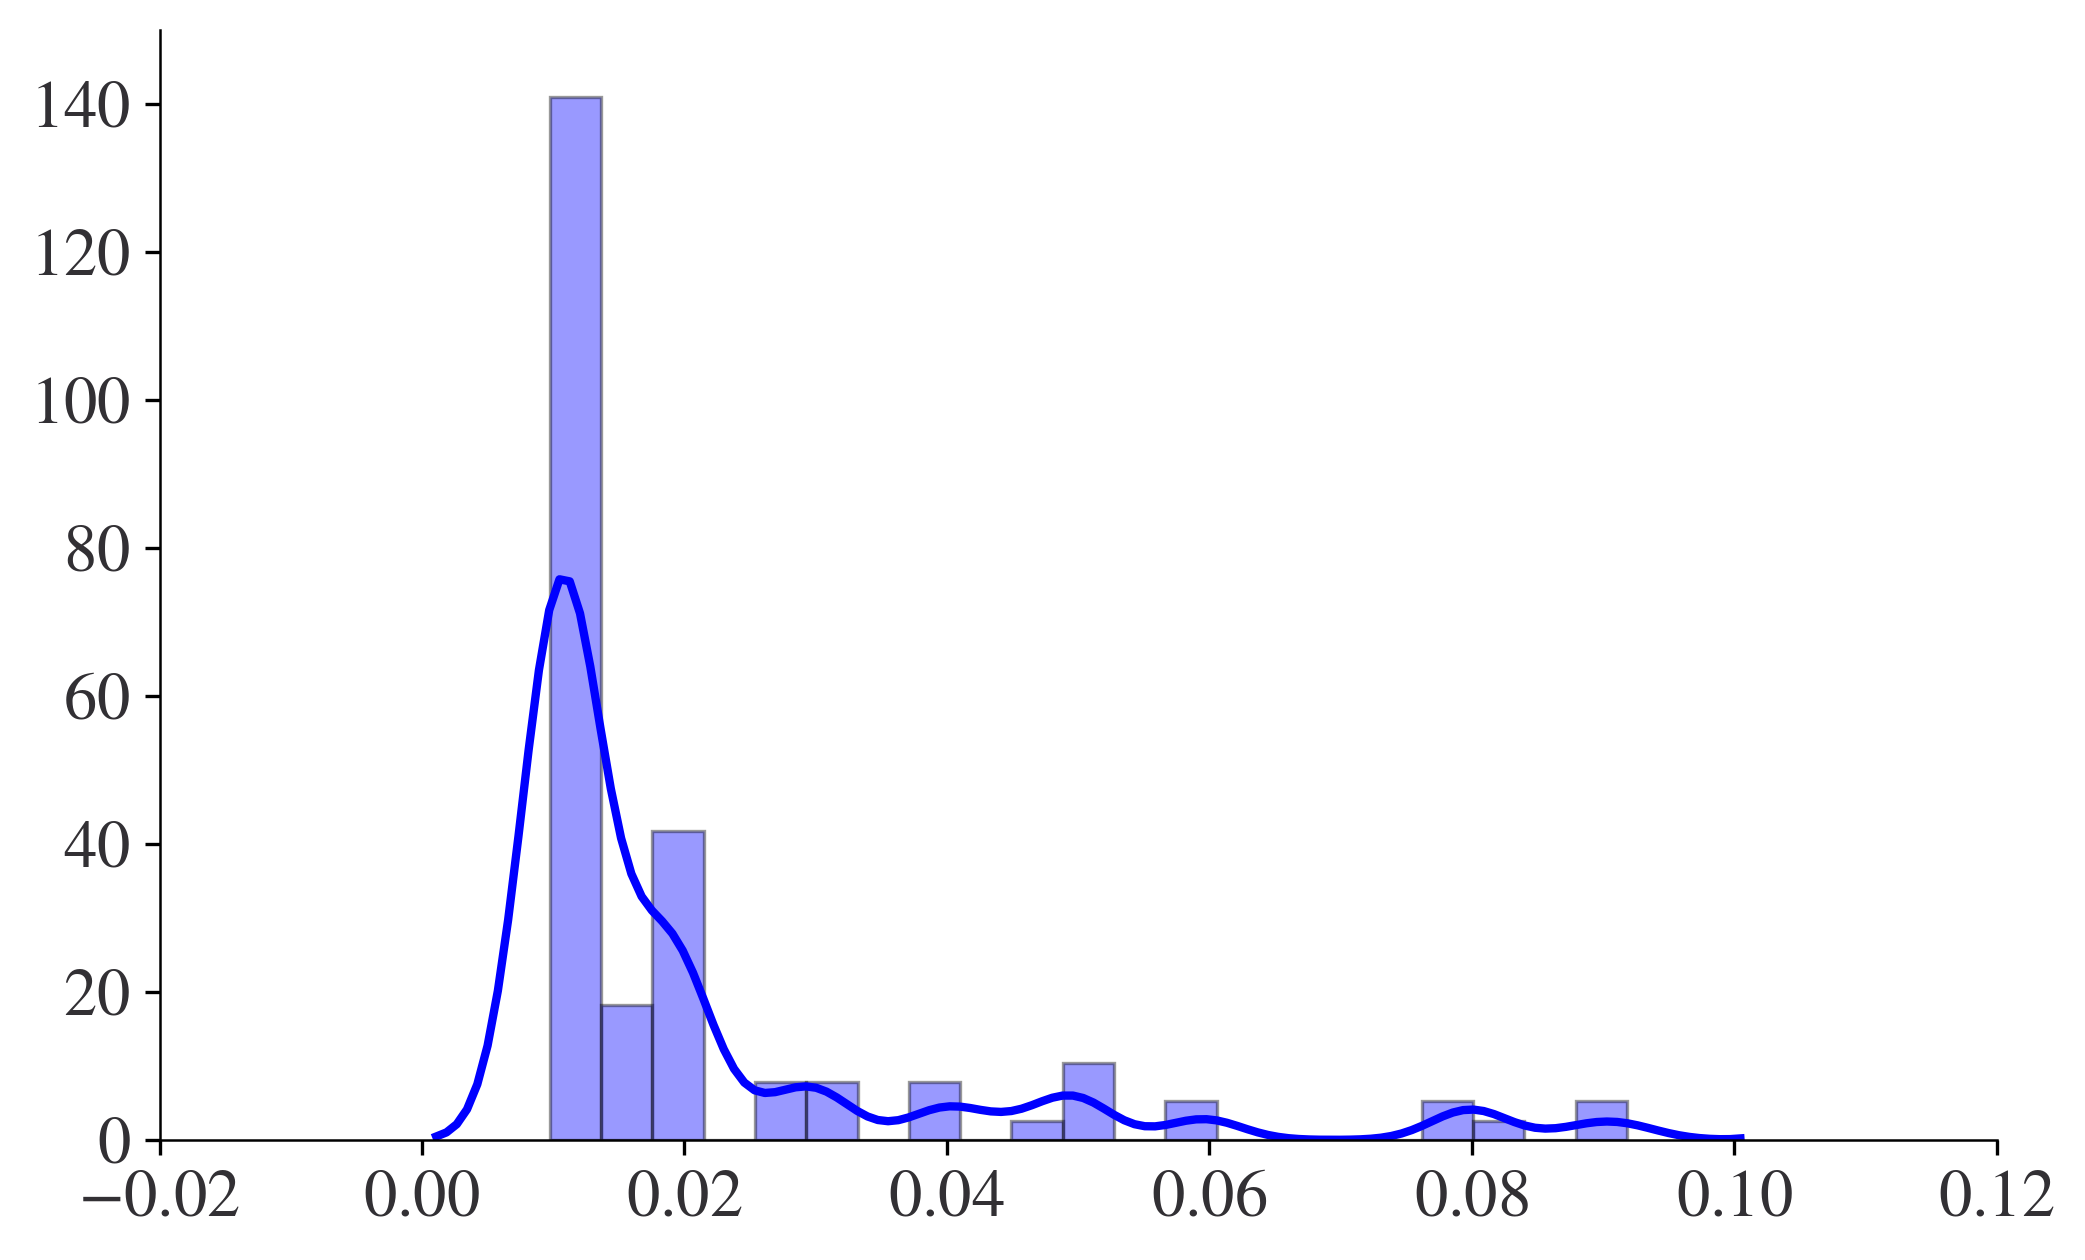

In [75]:
import seaborn as sns
from scipy.stats import norm, levy
import matplotlib.pyplot as plt
from scipy.stats import probplot
sns.distplot(z_across_point_in_time, fit =norm ,kde= True, color = 'r', label ='Point in time')
fig1_location = os.path.join(figures_destination, symbols[symbolIdx]+str('PIT_duration.png'))
plt.savefig(fig1_location)
plt.show()
ax2=sns.distplot(z_across_time,kde= True, color = 'b')
fig2_location = os.path.join(figures_destination, symbols[symbolIdx]+str('TTD_duration.png'))
plt.savefig(fig2_location)



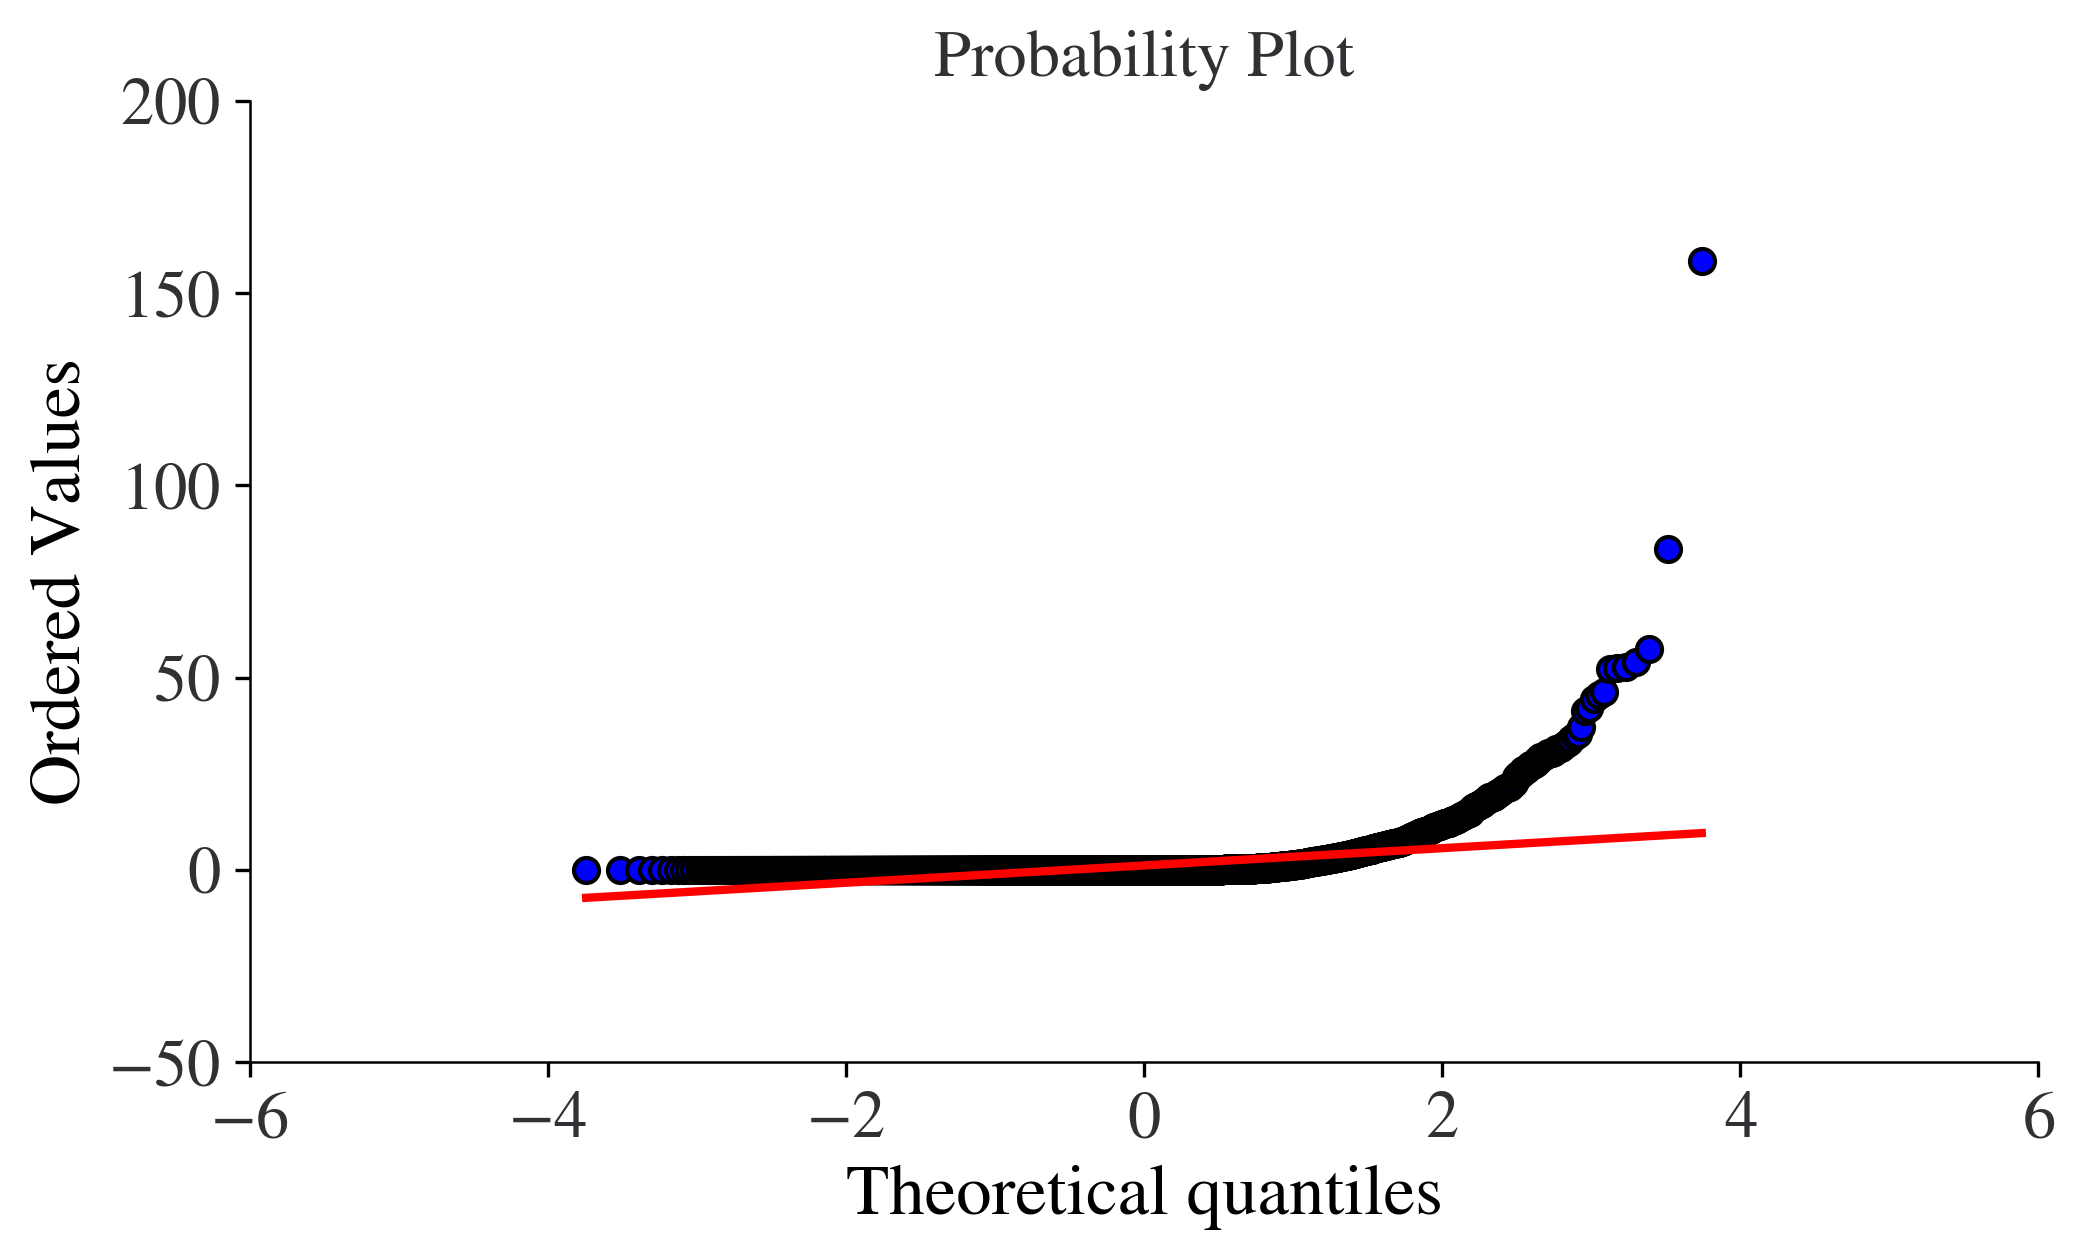

In [76]:
import pylab
g = probplot(z_across_point_in_time,dist='norm',plot=pylab, fit=True)
fig3_location = os.path.join(figures_destination, symbols[symbolIdx]+str('PIT_prob_plot.png'))
plt.savefig(fig3_location)

pylab.show(g)   

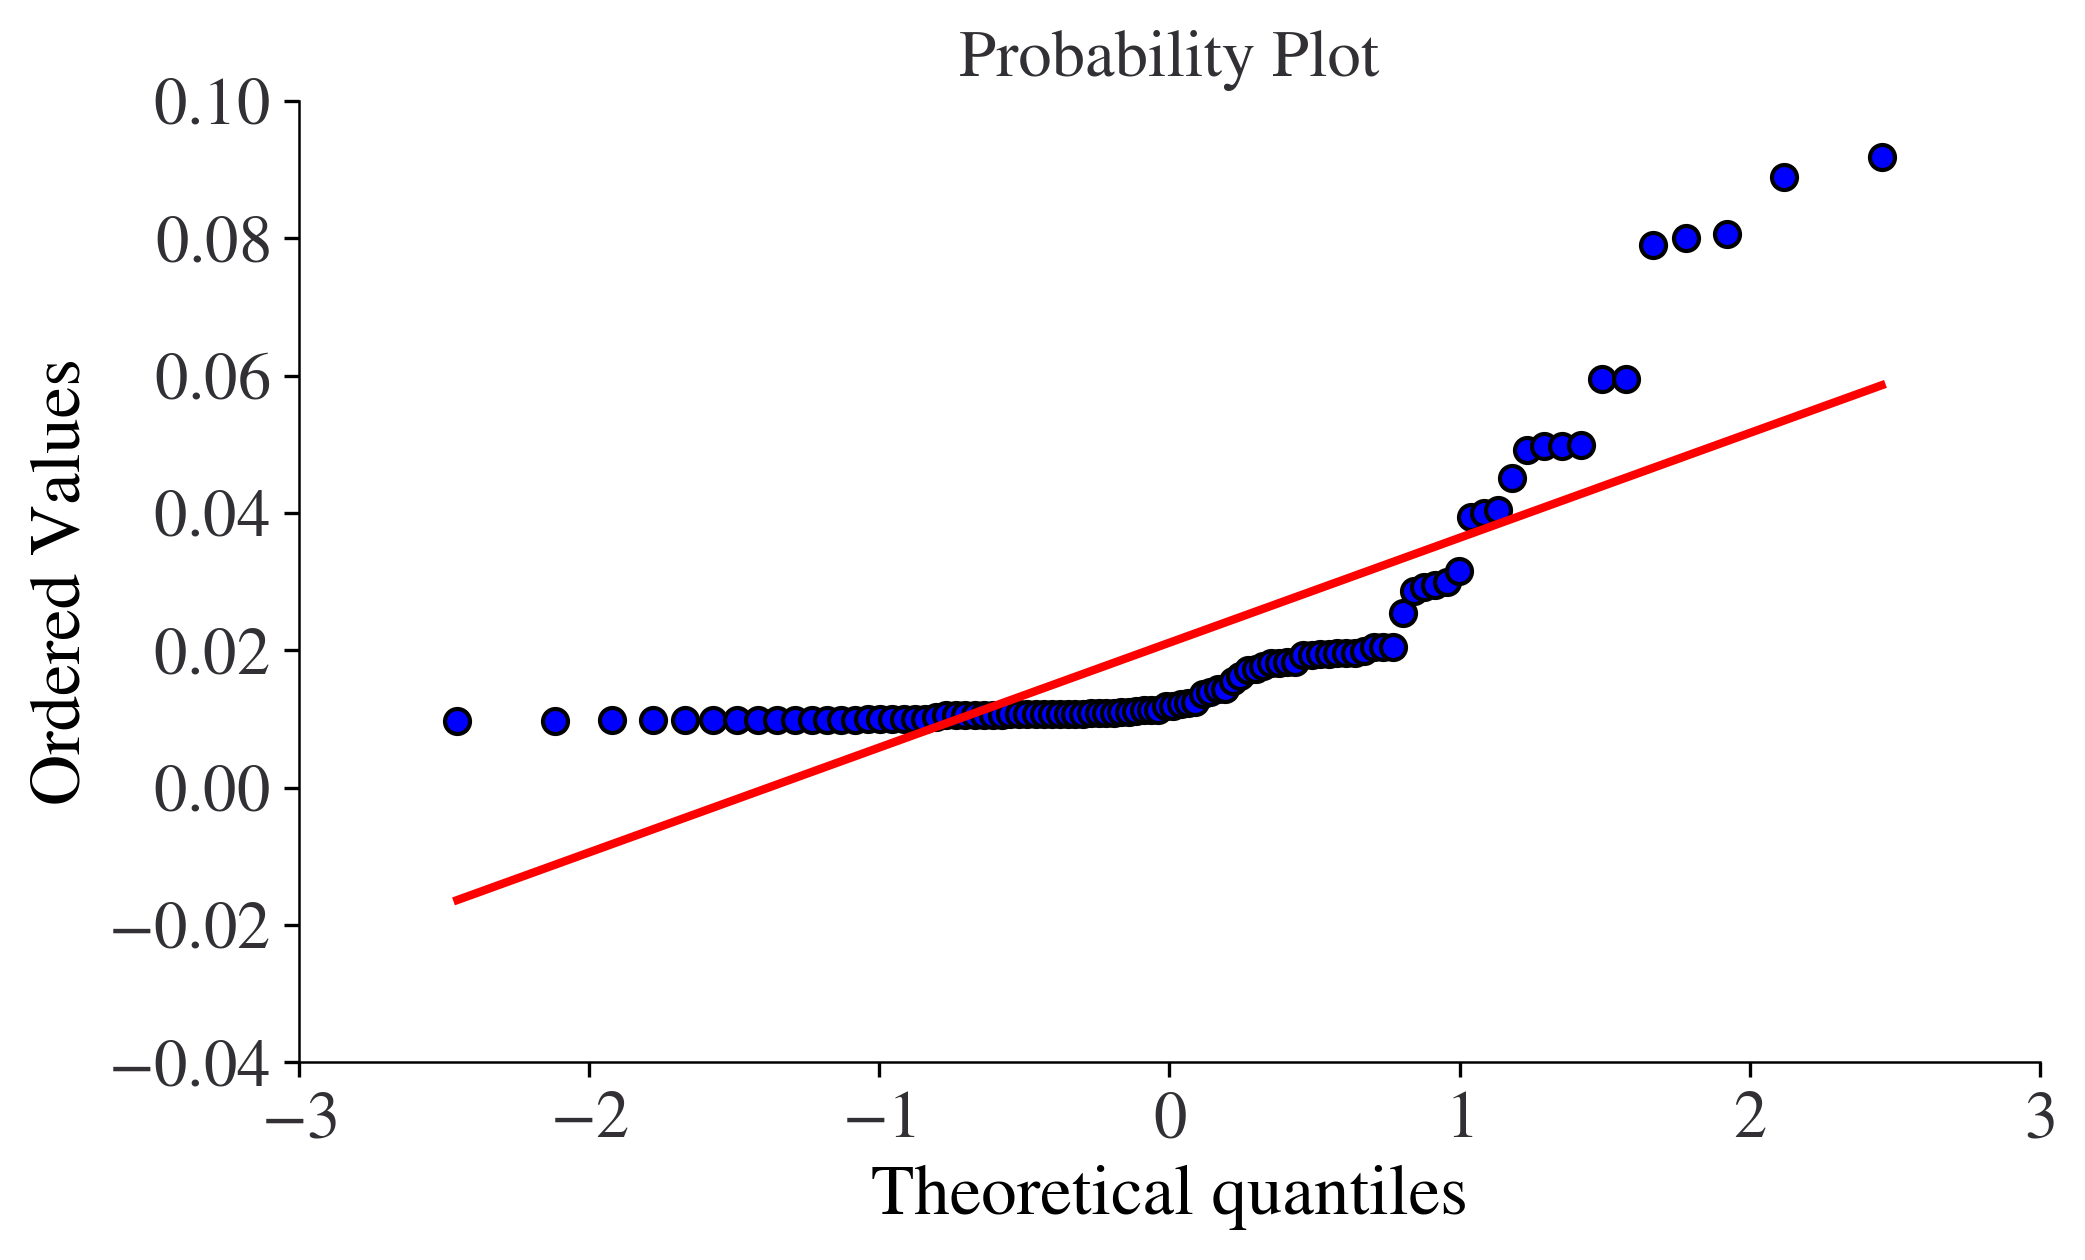

In [77]:
import pylab
g = probplot(z_across_time,dist='norm',plot=pylab)
fig4_location = os.path.join(figures_destination, symbols[symbolIdx]+str('_TTD_prob_plot.png'))
plt.savefig(fig4_location)
pylab.show(g) 

In [ ]:

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

In [113]:


df_concatenated = pd.concat(nonzero_df, axis=0, ignore_index=True)

In [114]:
df_concatenated.columns.values

array(['Duration', 'ReturnTradedPrice'], dtype=object)

In [115]:
x = df_concatenated['Duration']
y = df_concatenated['ReturnTradedPrice']


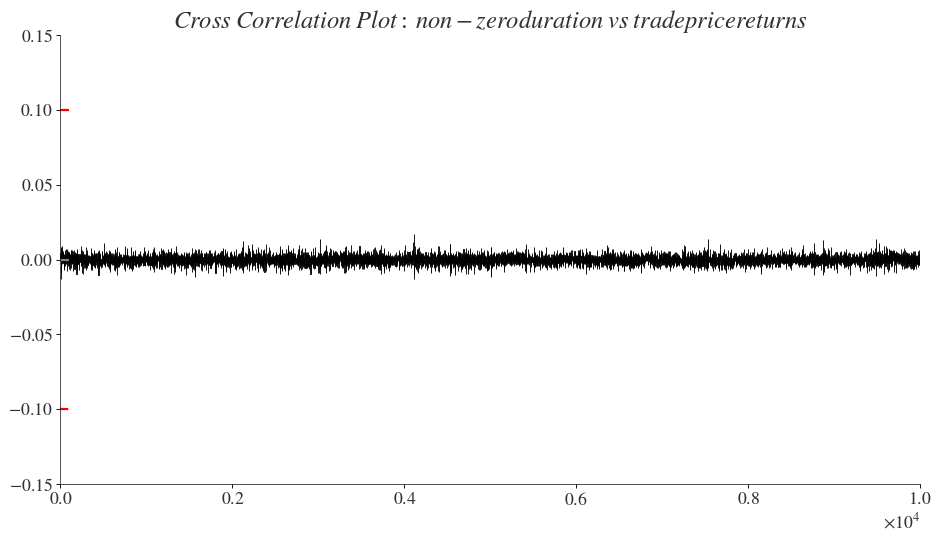

In [122]:
import statsmodels.tsa.stattools as stattools

#Compute Cross Correlations
ccs = stattools.ccf(x, y)[:10000]
nlags = 100 #len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(0.5*conf_level, xmin=0, xmax=100, color='red')
plt.hlines(-0.5*conf_level, xmin=0, xmax=100, linestyle ='--',color='red')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; non-zero duration\; vs\; trade price returns$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

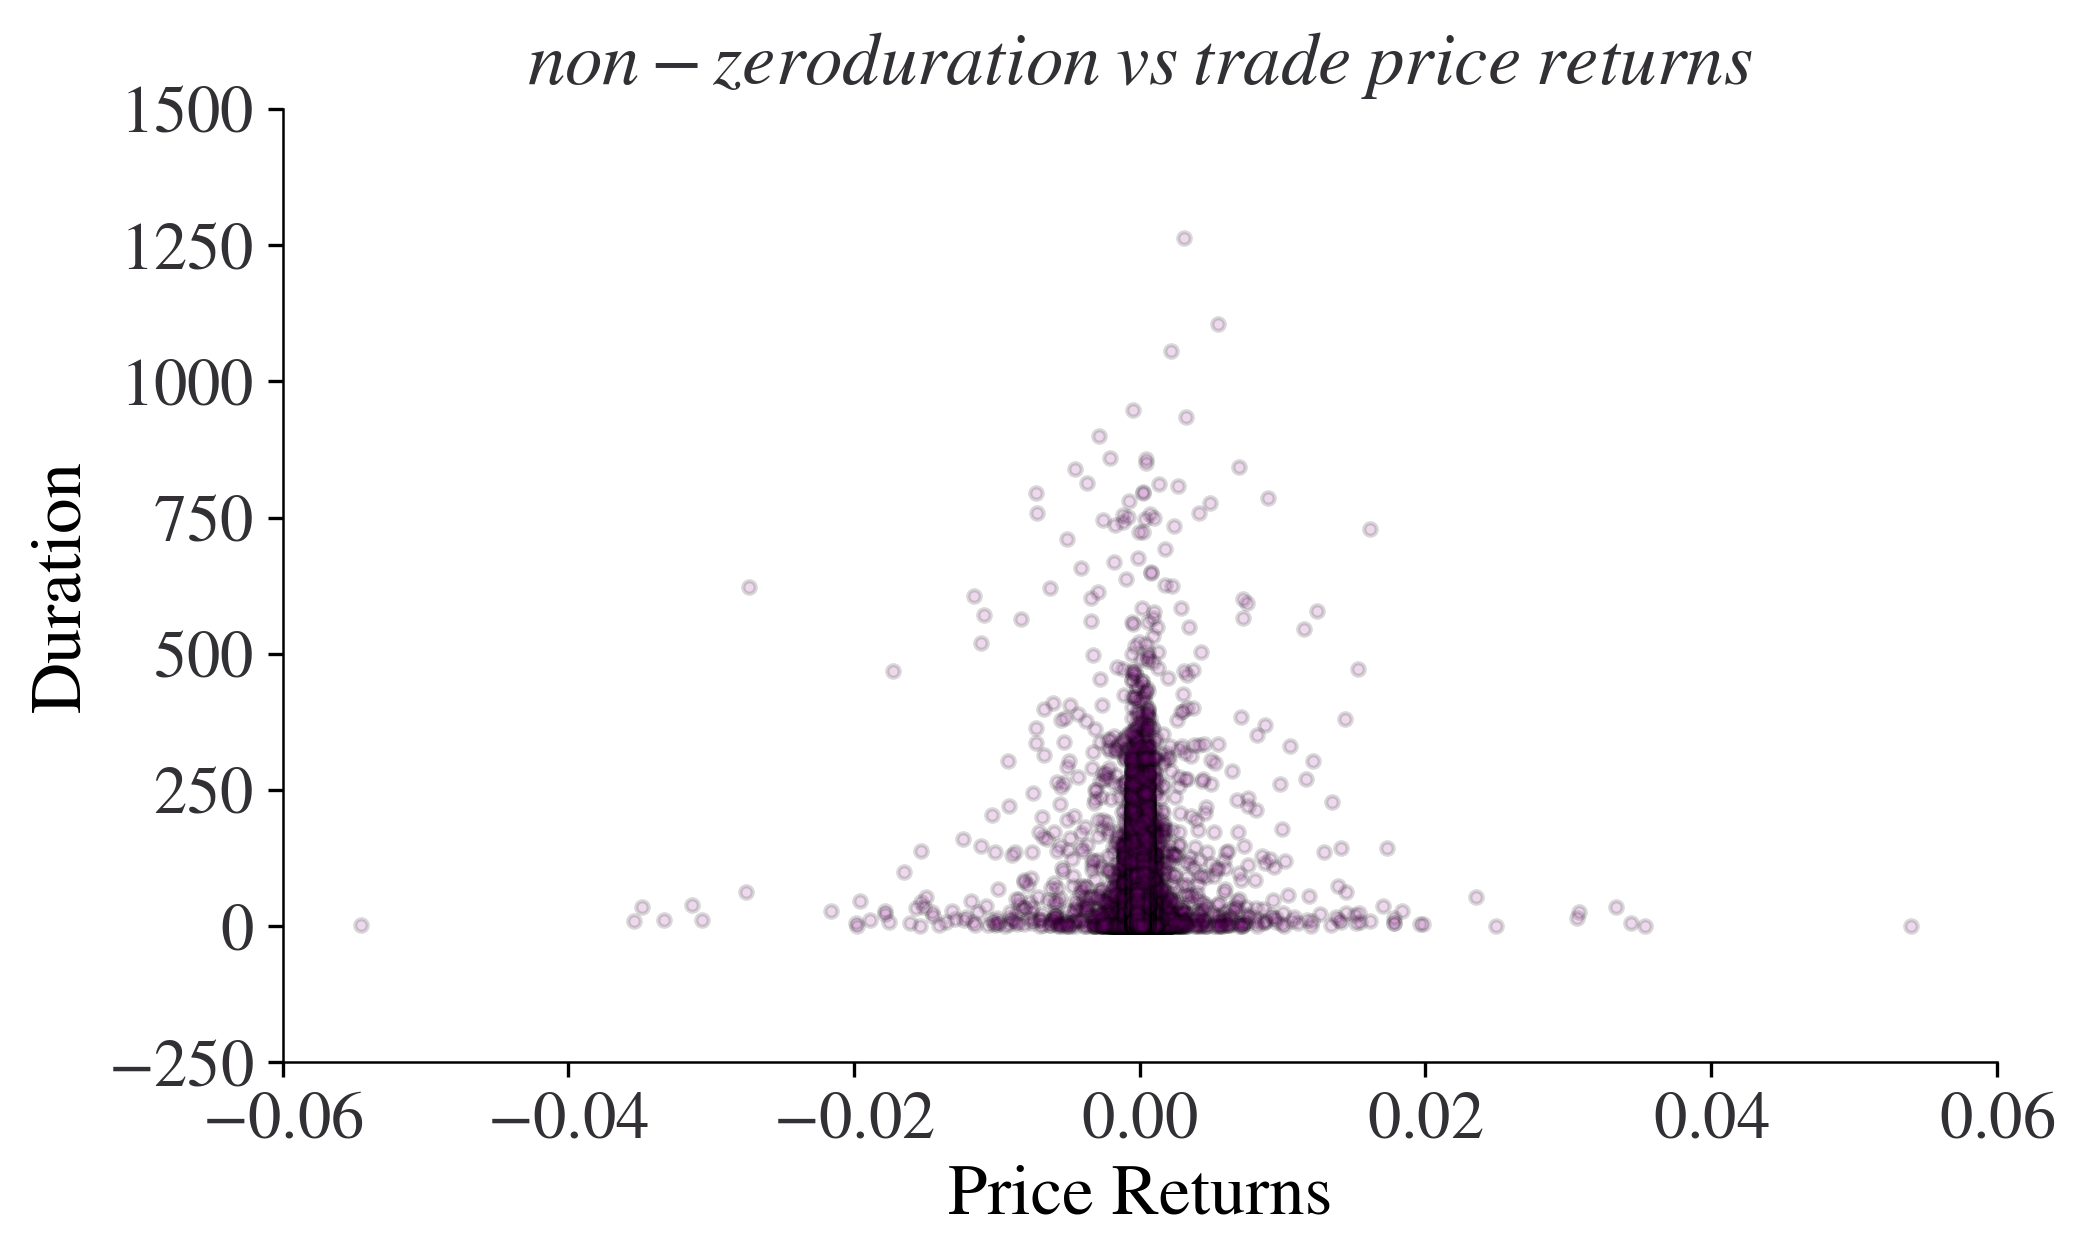

In [132]:

# Plot with transparency
plt.plot( y, x, "",  linestyle='', marker='o', markersize=3, alpha=0.15, color="purple")
 
# Titles
plt.xlabel('Price Returns')
plt.ylabel('Duration')
plt.title('$non-zero duration\; vs\; trade \;price \;returns$', fontsize=18)


plt.show()